# **Introduction**

This is the case study that needs to be done during the **Google Professional Certificate in Data Analytics**. This task could be compared to the work of a junior data analyst, who has to perform many real-world tasks, such as data cleaning, data analysis, and data visualization.


Title: **Bellabeat Case Study**

Business Task: **Analyze smart device data to gain insight into how consumers are using their smart devices. How can a Wellness Technology Company play it smart?**

Procedure: Following the steps of the data analysis process: **Ask, Prepare, Process, Analyze, Share, and Act**.


Author: Maximilian Labrot


Data: https://www.kaggle.com/arashnic/fitbit


Date: 2022-09-20

---


##

## What is Bellabeat and what is their business?

Bellabeat is a high-tech manufacturer of health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females. 







# **Step 1: Ask**

****1. What are the key business questions:****
   
   * What are the trends?
   * How could they be applied to Bellabeat customers?
   * How could they help to influence the marketing strategy?
   * How are users interacting with their smart devices?
   * How could Bellabeat use this data to influence marketing strategy?
   * How could Bellabeat use the data to influence product development?
   * How could Bellabeat use the data to influence sales strategy?
   * How could Bellabeat use the data to influence customer service strategy?

****2. What are the key deliverables:****
   
   * A presentation that includes:
      * A high-level overview of the data analysis process
      * A summary of your analysis
      * Supporting visualizations and key findings
      * Your top three high-level content recommendations based on your analysis

   
**3. What are the key stakeholders to deliver the project to:**
   
   * Bellabeat's marketing analyst
   * Bellabeat's CEO
   * Bellabeat's marketing manager
   * Bellabeat's product manager
   * Bellabeat's sales manager
   * Bellabeat's customer service manager 

---
   

# **Step 2: Prepare**

****1. Are there limitations?:****
   
   * Data from just 30 female users
   * Data is from 2016
   

-> *Conclusion:* The data set is very outdated. It is not very meaningful,
                 because the data was collected from a small number of 
                 persons.
                 It should also be noted that the fitness awareness, exercise
                 habits have probably changed over the years.
                  For example, 
                 current data collected in the wake of COVID-19 pandemic would
                 be interesting to compare with years without pandemic and 
                 lockdowns.
                 We could derive questions as to whether there is a connection
                 between burning less calories and activity levels and the
                 increase in weight during the pandemic.

---

# **Step 3: Process**

****Setting up the Environment: Import and install libraries****


In [45]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

****Import the dataset****

In [7]:
# import data from the fitabase Data
df_daily_activity = pd.read_csv("dailyActivity_merged.csv")


****First insights and overview from the dataset****

In [8]:
# show the head of the data
df_daily_activity.head (5)




,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


****Basic information of data****

In [9]:
# show the shape of the data
df_daily_activity.shape


(940, 15)

****Are there null values in the dataset?****

In [10]:
# check if there are null values
df_daily_activity.isnull().sum()


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

****What are the datatypes in the dataset?****

In [11]:
# datatypes in the dataframe
df_daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

****Are there any duplicates in the dataset?****
    

In [12]:
# check for duplicates
df_daily_activity.duplicated().sum()


0

****Which data manipulation could be made?****
   * Change the datatype of the column "ActivityDate" to datetime
   * Change the format of "ActivityDate" to YYYY-MM-DD
   * Set up new column "WeekDay" with the weekday of the date
   * Set up new column to display the amount of tracked minutes

In [13]:
# Convert Activity Date to datetime
df_daily_activity['ActivityDate'] = pd.to_datetime(df_daily_activity['ActivityDate'])

# Did the conversion work?
df_daily_activity.dtypes




Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [14]:
# new column for total_mins being the sum of total time in minutes for each activity
df_daily_activity['total_mins'] = df_daily_activity['VeryActiveMinutes'] + df_daily_activity['FairlyActiveMinutes'] + df_daily_activity['LightlyActiveMinutes'] + df_daily_activity['SedentaryMinutes']


In [15]:
# print daily activity
df_daily_activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_mins
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040


In [16]:
# create new column "day_of_the_week" to represent day of the week 
df_daily_activity["DayOfTheWeek"] = df_daily_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
df_daily_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [17]:
# rename columns
df_daily_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_daily_activity.columns.values)
df_daily_activity.head(5)

['id' 'date' 'total_steps' 'total_dist' 'track_dist' 'logged_dist'
 'very_active_dist' 'moderate_active_dist' 'light_active_dist'
 'sedentary_active_dist' 'very_active_mins' 'fairly_active_mins'
 'lightly_active_mins' 'sedentary_mins' 'calories' 'total_mins'
 'day_of_the_week']


,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,total_mins,day_of_the_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,Saturday


In [18]:
# create new column "total_mins" containing sum of total minutes.
df_daily_activity["total_mins"] = df_daily_activity["very_active_mins"] + df_daily_activity["fairly_active_mins"] + df_daily_activity["lightly_active_mins"] + df_daily_activity["sedentary_mins"]
df_daily_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [19]:
# convert the total_mins in hours 
df_daily_activity["total_hours"] = df_daily_activity["total_mins"]/60
df_daily_activity["total_hours"].head(5)

# round the results to 2 decimal places
df_daily_activity["total_hours"] = df_daily_activity["total_hours"].round()
df_daily_activity["total_hours"].head(5)


0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

---

# **Step 4: Analyze**

****Perform calculations****

In [20]:
# general statistics of the data
df_daily_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,total_mins,total_hours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


In [38]:
# just print the mean row
df_daily_activity.describe().loc["mean"]



total_steps             7637.91
total_dist                 5.49
track_dist                 5.48
logged_dist                0.11
very_active_dist           1.50
moderate_active_dist       0.57
light_active_dist          3.34
sedentary_active_dist      0.00
very_active_mins          21.16
fairly_active_mins        13.56
lightly_active_mins      192.81
sedentary_mins           991.21
calories                2303.61
total_mins              1218.75
total_hours               20.31
Name: mean, dtype: float64

****What do we see here?****

   * The average amount of steps per day is 7,638 rounded.
   * The average total distance is 5.49 km. 
   * The average amount of calories burned per day is 2304 rounded.
   * Sedentary users are the most common users.
   

# **Step 5: Share**

****Visualization****

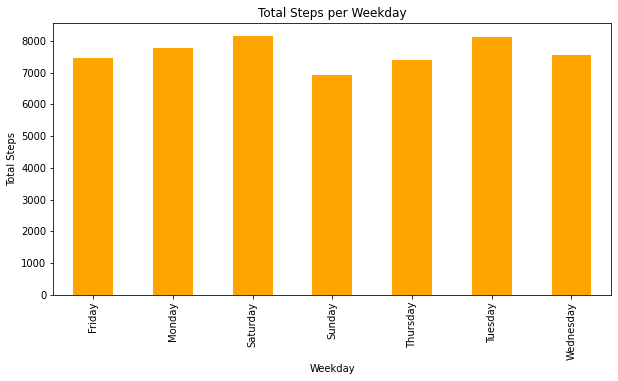

In [48]:
# do first visualization to vizualize the total steps per weekday

# this is the location of the annotated text
x = 
df_daily_activity.groupby("day_of_the_week")["total_steps"].mean().plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Total Steps per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Steps")
plt.show()



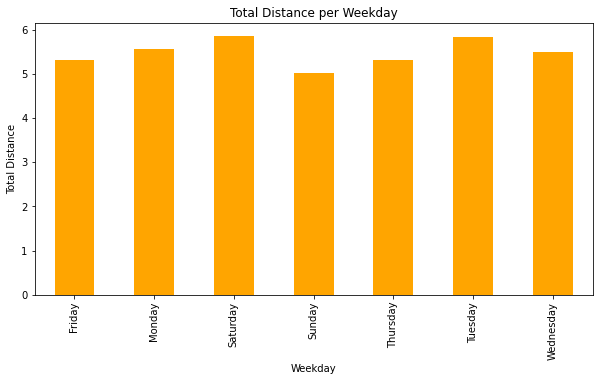

In [42]:
# in addition to the total steps per weekday, we can also visualize the total distance per weekday
df_daily_activity.groupby("day_of_the_week")["total_dist"].mean().plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Total Distance per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Distance")
plt.show()

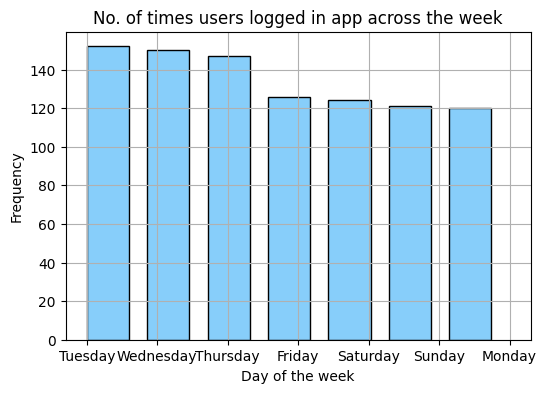

In [55]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df_daily_activity.day_of_the_week, bins = 7, 
         width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

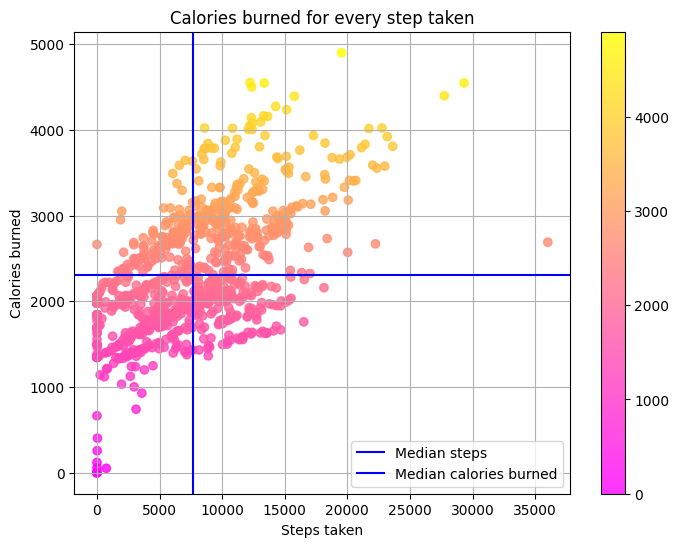

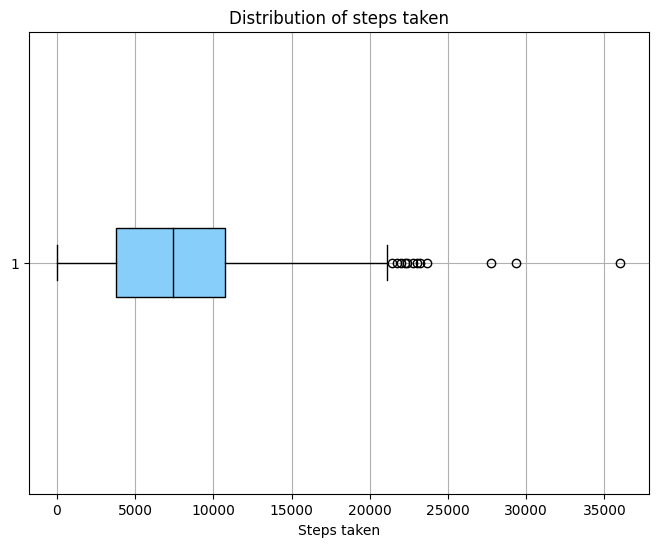

In [73]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_daily_activity.total_steps, df_daily_activity.calories, 
            alpha = 0.8, c = df_daily_activity.calories, 
            cmap = "spring")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Blue", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()

# draw an average line
plt.show()

# plotting boxplot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.boxplot(df_daily_activity.total_steps, vert = False,
            patch_artist = True,
            boxprops = dict(facecolor = "lightskyblue", color = "black"),
            capprops = dict(color = "black"),
            whiskerprops = dict(color = "black"),
            flierprops = dict(color = "red", markeredgecolor = "black"),
            medianprops = dict(color = "black"))

# add annotations and visuals
plt.xlabel("Steps taken")
plt.title("Distribution of steps taken")
plt.grid(True)
plt.show()


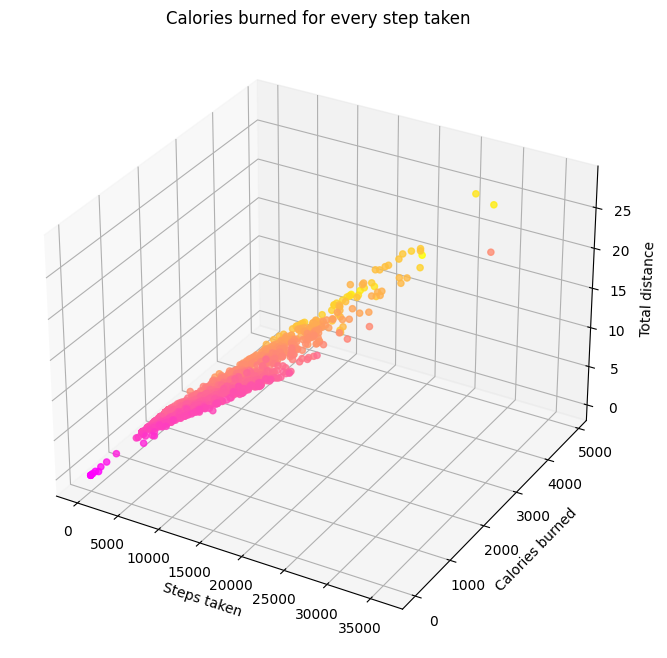

In [66]:
# plot a 3d scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.scatter(df_daily_activity.total_steps, df_daily_activity.calories, df_daily_activity.total_dist,
              c = df_daily_activity.calories, cmap = "spring", alpha = 0.8)

# add annotations and visuals
ax.set_xlabel("Steps taken")
ax.set_ylabel("Calories burned")
ax.set_zlabel("Total distance")
ax.set_title("Calories burned for every step taken")
plt.show()


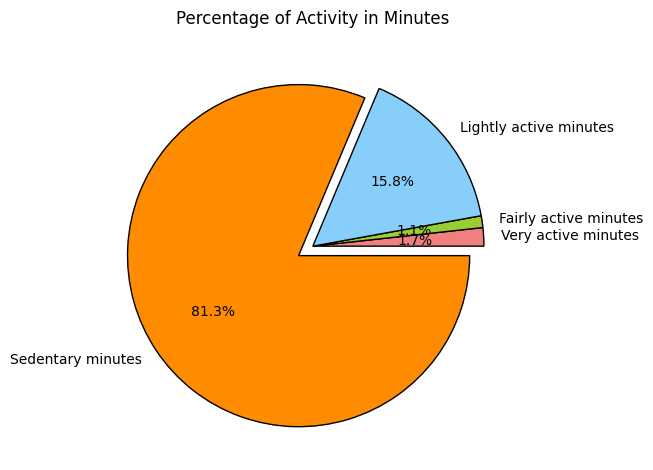

In [69]:
# calculating total of individual minutes column
very_active_mins = df_daily_activity["very_active_mins"].sum()
fairly_active_mins = df_daily_activity["fairly_active_mins"].sum()
lightly_active_mins = df_daily_activity["lightly_active_mins"].sum()
sedentary_mins = df_daily_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

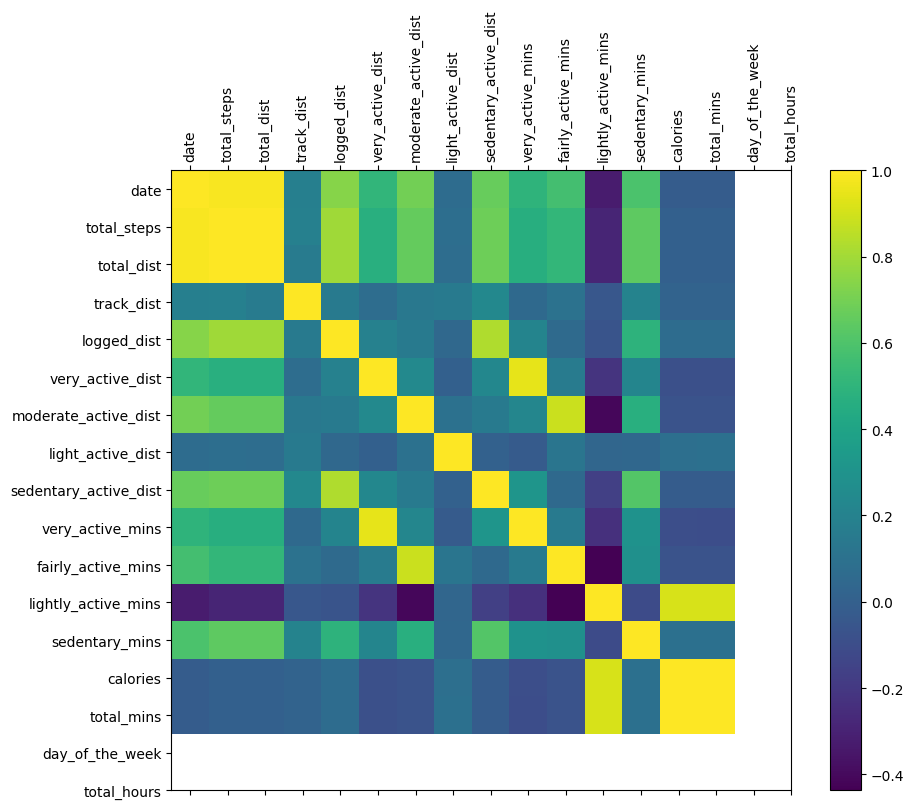

In [70]:
# visualize the correlation between the variables
plt.style.use("default")
plt.figure(figsize=(10,8))
plt.matshow(df_daily_activity.corr(), fignum = 1)
plt.xticks(range(len(df_daily_activity.columns)), df_daily_activity.columns, rotation = 90)
plt.yticks(range(len(df_daily_activity.columns)), df_daily_activity.columns)
plt.colorbar()


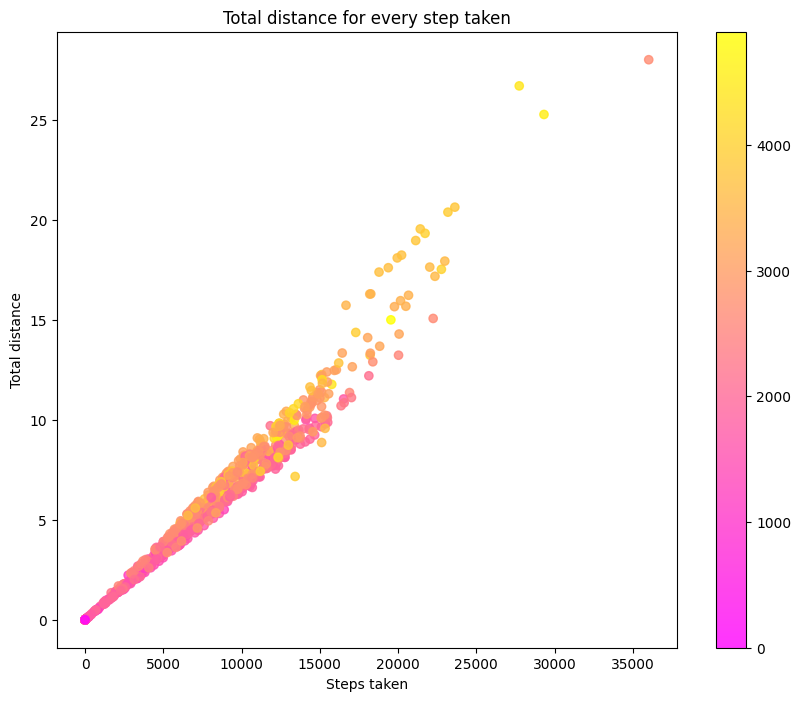

In [82]:
# plot the total_steps and total_dist
plt.style.use("default")
plt.figure(figsize=(10,8))
plt.scatter(df_daily_activity.total_steps, df_daily_activity.total_dist,
            c = df_daily_activity.calories, cmap = "spring", alpha = 0.8)
plt.xlabel("Steps taken")
plt.ylabel("Total distance")
plt.title("Total distance for every step taken")
plt.colorbar(orientation = "vertical")
plt.show()


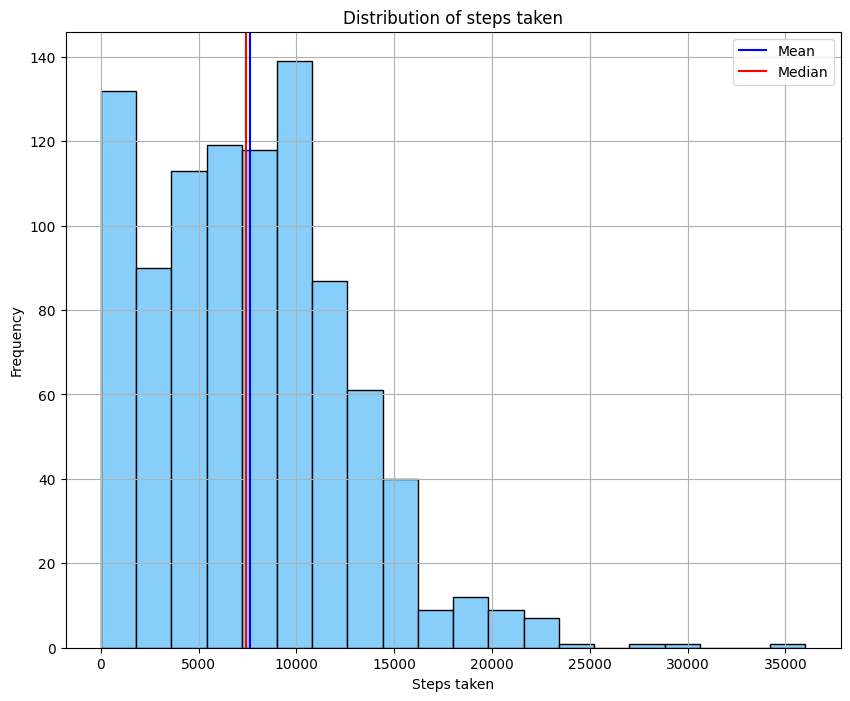

In [84]:
# plot an annotated graussian curve
plt.style.use("default")
plt.figure(figsize=(10,8))
plt.hist(df_daily_activity.total_steps, bins = 20, color = "lightskyblue", edgecolor = "black")
plt.xlabel("Steps taken")
plt.ylabel("Frequency")
plt.title("Distribution of steps taken")
plt.grid(True)

# add annotations
plt.axvline(df_daily_activity.total_steps.mean(), color = "Blue", label = "Mean")
plt.axvline(df_daily_activity.total_steps.median(), color = "Red", label = "Median")
plt.legend()
plt.show()



# **Step 6: Act**

****1. What trends can we discover?:****
   
   * Most of users are tracked sedentary.
   * Most users are tracked on weekdays.
   * Sunday is the day with the least amount of tracked minutes.
   * The average amount of steps per day is 7,638 rounded.
   * The average total distance is 5.49 km.
   * The average amount of calories burned per day is 2304 rounded.
   * The average amount of active minutes per day is 25 rounded.
   * The average amount of very active minutes per day is 3 rounded.
   * The average amount of fairly active minutes per day is 21 rounded.
   * The average amount of lightly active minutes per day is 1 rounded.
   * On weekdays are more users tracked than on weekends.

****2. How we can use these trends to influence the marketing strategy?:****
   * The marketing strategy should be focused on the weekdays. They could
     offer discounts on weekdays or implement a loyalty program for 
       weekdays.
   * On the other hand, they could offer discounts on weekends to increase
     the amount of users tracked on weekends.
   * Depending on the target group, they could offer discounts on certain
     days of the week. For example, they could offer discounts on Monday
     for people who want to start the week with a good mood and a good
     start.
   * A good suggestion could be also to prompt notifications to users
     who are tracked sedentary to motivate them to move more.
   * In cooperation with local healthy food stores, they could offer
     discounts on healthy food for users who are tracked active.
  
  
   
---


